<a href="https://colab.research.google.com/github/Shrey1410/minor_proj/blob/main/Minor_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d mohitsingh1804/plantvillage

Dataset URL: https://www.kaggle.com/datasets/mohitsingh1804/plantvillage
License(s): GPL-2.0
100% 818M/818M [00:28<00:00, 38.8MB/s]
100% 818M/818M [00:28<00:00, 30.0MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/plantvillage.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
    )
train_ds = train.flow_from_directory(
    directory = "/content/PlantVillage/train",
    target_size = (256,256),
    batch_size = 32,
    class_mode = "sparse"
)
val = ImageDataGenerator(
    rescale = 1./255
)
val_ds = val.flow_from_directory(
    directory = "/content/PlantVillage/val",
    target_size = (256,256),
    batch_size = 32,
    class_mode = "sparse"
)

Found 43444 images belonging to 38 classes.
Found 10861 images belonging to 38 classes.


In [7]:
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     directory = "/content/PlantVillage/train",
#     labels="inferred",
#     label_mode="int",
#     color_mode="rgb",
#     batch_size=32,
#     image_size=(256, 256)
# )

# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     directory = "/content/PlantVillage/val",
#     labels="inferred",
#     label_mode="int",
#     color_mode="rgb",
#     batch_size=32,
#     image_size=(256, 256)
# )

In [8]:
# def process(image , label):
#   image = tf.cast(image/255.0, tf.float32)
#   return image, label
# train_ds = train_ds.map(process)
# val_ds = val_ds.map(process)

In [9]:
    model = Sequential()
    model.add(Conv2D(32,(3,3),strides = 1,padding = 'same',input_shape = (256,256,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Conv2D(64, (5,5), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Conv2D(128, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Conv2D(256, (5,5), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Conv2D(512, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Flatten())
    model.add(Dense(2048))
    model.add(Activation('relu'))
    model.add(Dense(38, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │      67,110,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          77,862 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,314,406 (264.41 MB)

 Trainable params: 69,314,406 (264.41 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_ds,epochs=5,validation_data=val_ds)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 740s 528ms/step - accuracy: 0.3770 - loss: 2.3190 - val_accuracy: 0.7600 - val_loss: 0.7482
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 689s 505ms/step - accuracy: 0.8033 - loss: 0.6041 - val_accuracy: 0.8558 - val_loss: 0.4432
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 688s 504ms/step - accuracy: 0.8832 - loss: 0.3522 - val_accuracy: 0.8895 - val_loss: 0.3340
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 685s 502ms/step - accuracy: 0.9170 - loss: 0.2499 - val_accuracy: 0.9072 - val_loss: 0.2897
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 742s 503ms/step - accuracy: 0.9366 - loss: 0.1912 - val_accuracy: 0.9095 - val_loss: 0.2981


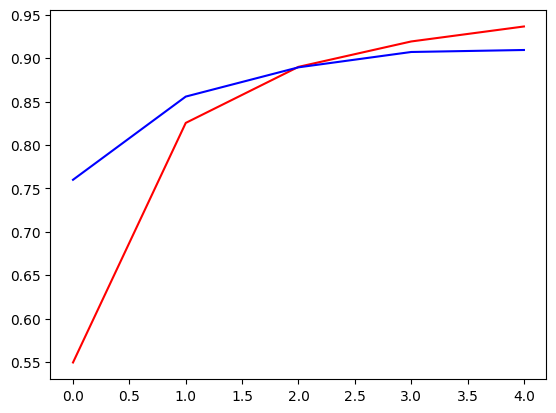

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')

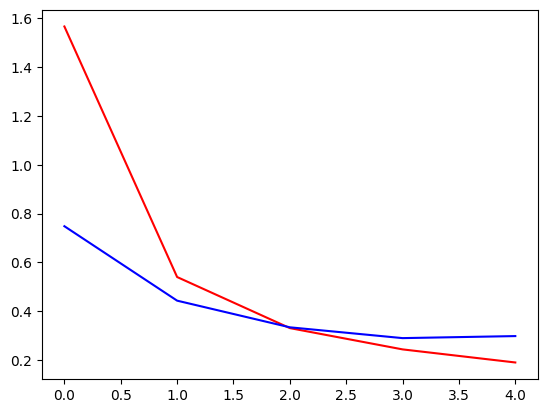

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')